# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


In [41]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | olafsvik
Processing Record 3 of Set 1 | terekli-mekteb
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | hirara
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nioro
Processing Record 8 of Set 1 | binabalian
Processing Record 9 of Set 1 | fort abbas
Processing Record 10 of Set 1 | balkhash
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | wright
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | hailey
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | lugovoy
Processing Record 21 of Set 1 | grindavik
Processing Record 22 of Set 1 | ponta do s

Processing Record 38 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 39 of Set 4 | fukue
Processing Record 40 of Set 4 | winnemucca
Processing Record 41 of Set 4 | pundaguitan
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | mountain home
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | miyako
Processing Record 47 of Set 4 | malpe
Processing Record 48 of Set 4 | baruun-urt
Processing Record 49 of Set 4 | aitape
Processing Record 50 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 5 | muheza
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | kiruna
Processing Record 8 of Set 5 | mantua
Processing Record 9 of Set 5 | nalut
Processing Record 10 of Set 5 | rivier

Processing Record 25 of Set 8 | bengkulu
Processing Record 26 of Set 8 | kirakira
Processing Record 27 of Set 8 | murwara
Processing Record 28 of Set 8 | gaomi
Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | fairbanks
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | yirol
City not found. Skipping...
Processing Record 34 of Set 8 | yiyang
Processing Record 35 of Set 8 | samsun
Processing Record 36 of Set 8 | kot diji
Processing Record 37 of Set 8 | yomou
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | xinzhi
Processing Record 40 of Set 8 | miami
Processing Record 41 of Set 8 | kyabe
Processing Record 42 of Set 8 | lixourion
Processing Record 43 of Set 8 | las delicias
Processing Record 44 of Set 8 | ambulu
Processing Record 45 of Set 8 | talara
Processing Record 46 of Set 8 | northam
Processing Record 47 of Set 8 | marystown
Processing Record 48 of Set 8 | santa rosa
P

Processing Record 13 of Set 12 | malakal
Processing Record 14 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 15 of Set 12 | port-cartier
Processing Record 16 of Set 12 | katangli
Processing Record 17 of Set 12 | mahibadhoo
Processing Record 18 of Set 12 | arkhangelskaya
Processing Record 19 of Set 12 | awjilah
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | merauke
Processing Record 24 of Set 12 | carbondale
Processing Record 25 of Set 12 | tessalit
Processing Record 26 of Set 12 | phu khieo
City not found. Skipping...
Processing Record 27 of Set 12 | bonthe
Processing Record 28 of Set 12 | borovskoy
Processing Record 29 of Set 12 | sarkand
Processing Record 30 of Set 12 | zeya
Processing Record 31 of Set 12 | calella
Processing Record 32 of Set 12 | omsukchan
Processing Record 33 of Set 12 | shebalino
Processing Record 34 of Set 12 | rungata
City not 

In [43]:
len(lat)
len(temp)

640

In [44]:
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          590
Lat           590
lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64


In [45]:
city_weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,22.71,73.0,100.0,10.00,US,1.668998e+09
1,olafsvik,64.8945,-23.7142,42.49,75.0,51.0,12.71,IS,1.668998e+09
2,terekli-mekteb,44.1671,45.8698,51.94,80.0,100.0,7.02,RU,1.668998e+09
3,hermanus,-34.4187,19.2345,53.80,86.0,24.0,5.75,ZA,1.668998e+09
4,hirara,24.8000,125.2833,80.87,61.0,20.0,14.97,JP,1.668998e+09


In [91]:
city_weather_df.to_csv("city_weather_data.csv", index=False)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

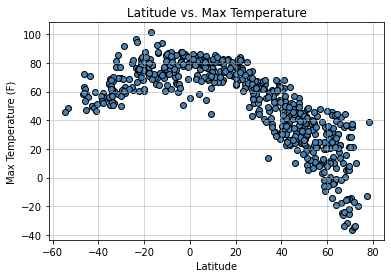

In [92]:
date_of_analysis = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Humidity

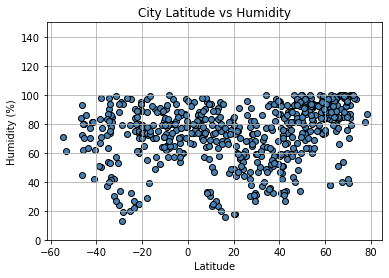

In [48]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.ylim(0, 150)
plt.grid()
plt.savefig("Latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Cloudiness

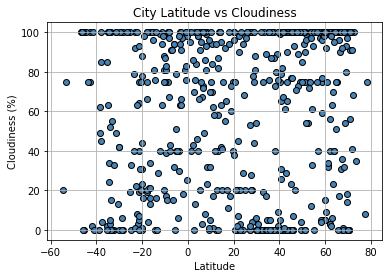

In [49]:
# Create a scatter plot for latitude vs cloudiness.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()
plt.savefig("Latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

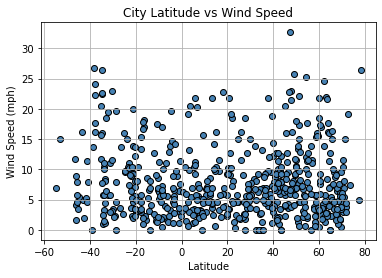

In [50]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values, y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()
plt.savefig("Latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [75]:
northern_hemisphere_weather_df = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = city_weather_df.loc[city_weather_df["Lat"] < 0]

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7302227355424061
The correlation between both factors is -0.85


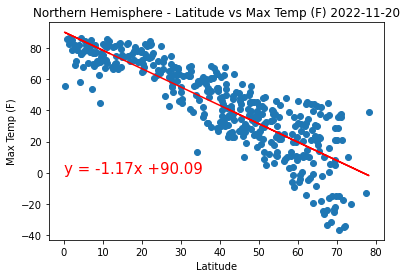

In [56]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

In [78]:
print(f"The result from the r-squared, there is a moderate, negative correlation between temp and latitude Northern Hemispshere cities.")

The result from the data showed that there is a strong, negative correlation between temp and latitude Northern Hemispshere cities.


The r-squared is: 0.4083777950280534
The correlation between both factors is 0.64


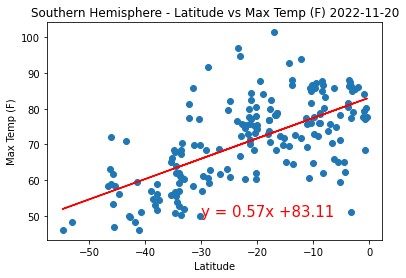

In [57]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

In [ ]:
print(f"The result from the r-quared, there is a very weak positive correlation between temp and latitude Southern Hemisphere cities.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11997304121027855
The correlation between both factors is 0.35


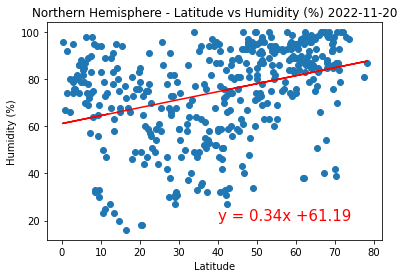

In [58]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

In [79]:
print(f"From the r-squared, there is a very weak positive correlation between humidity and latitude in the Northern Hemisphere cities.")

From the r-squared, there is a very weak positive correlation between humidity and latitude in the Northern Hemisphere cities.


The r-squared is: 0.11997304121027855
The correlation between both factors is 0.35


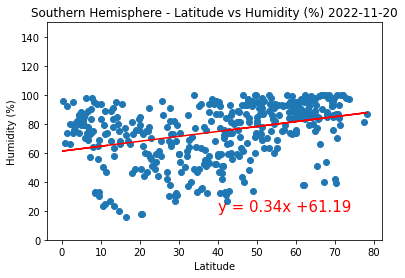

In [59]:
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

In [85]:
print(f"From the r-squared, there is a very weak positive correlation between humidity and latitude in the Southern Hemisphere cities.")

From the r-squared, there is a very weak correlation between humidity and latitude in the Southern Hemisphere cities.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008234315187281642
The correlation between both factors is 0.09


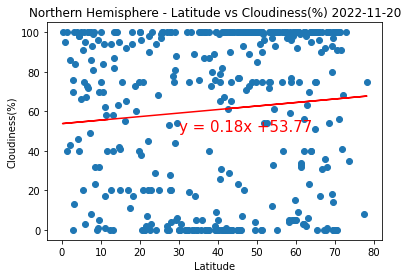

In [60]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

In [83]:
print(f"From the r-quared, there is a very weak correlation between cloudiness and Latitude in the Northern Hemisphere cities.")

From the r-quared, there is a very weak correlation between cloudiness and Latitude in the Northern Hemisphere cities.


The r-squared is: 0.02008004010331947
The correlation between both factors is 0.14


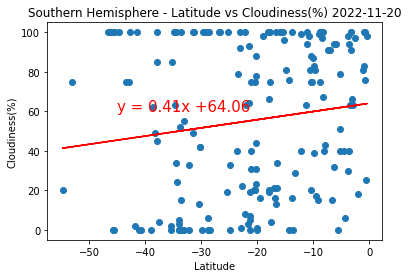

In [61]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

In [87]:
print(f"From the r-quared, there is a very weak positive correlation between cloudiness and Latitude in the Southern Hemisphere cities.")

From the r-quared, there is a very weak positive correlation between cloudiness and Latitude in the Southern Hemisphere cities.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00558099537131986
The correlation between both factors is 0.07


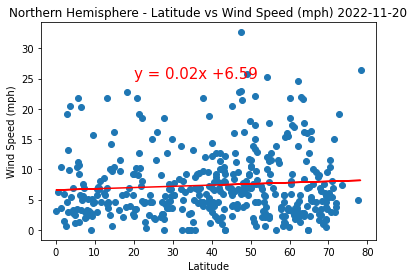

In [62]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

In [86]:
print(f"From the r-quared, there is a very weak correlation between windspeed and Latitude in the Northern Hemisphere cities.")

From the r-quared, there is a very weak correlation between cloudiness and Latitude in the Northern Hemisphere cities.


The r-squared is: 0.043610415945743004
The correlation between both factors is -0.21


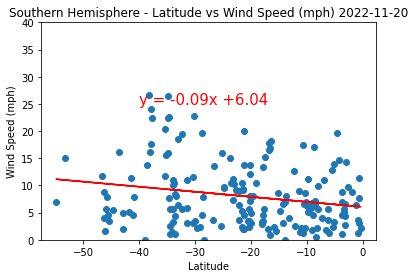

In [63]:
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [90]:
print(f"From the r-quared, there is a very weak negative correlation between windspeed and Latitude in the Southern Hemisphere cities.")

From the r-quared, there is a very weak negative correlation between windspeed and Latitude in the Southern Hemisphere cities.
